# House Prices Prediction With Regression Techniques

The dataset contains different features with thousends of observations. Our aim is to predict the selling price of a house based on the features.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading dataset with pandas
data=pd.read_csv('House_train.csv')
test1=pd.read_csv('House_test.csv')
#Sample data
data.head(), test1.head()

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

In [3]:
#Size of the dataset
print(data.shape)
print(test1.shape)

(1460, 81)
(1459, 80)


In [4]:
#Information of the variables
print(data.info())
print(test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Non numerical columns
Non_num=data.loc[:,data.dtypes==np.object]
Non_num1=test1.loc[:,test1.dtypes==np.object]
print('Number of categorical features present in training data :', len(Non_num.columns))
print('Number of categorical features present in testing data :', len(Non_num1.columns))

Number of categorical features present in training data : 43
Number of categorical features present in testing data : 43


In [6]:
#Numerical columns
Numerical=data.loc[:,data.dtypes!=np.object]
Numerical1=test1.loc[:,test1.dtypes!=np.object]
print('Number of numerical features present in training data :', len(Numerical.columns))
print('Number of numerical features present in training data :', len(Numerical1.columns))

Number of numerical features present in training data : 38
Number of numerical features present in training data : 37


GridSpec(6, 8)

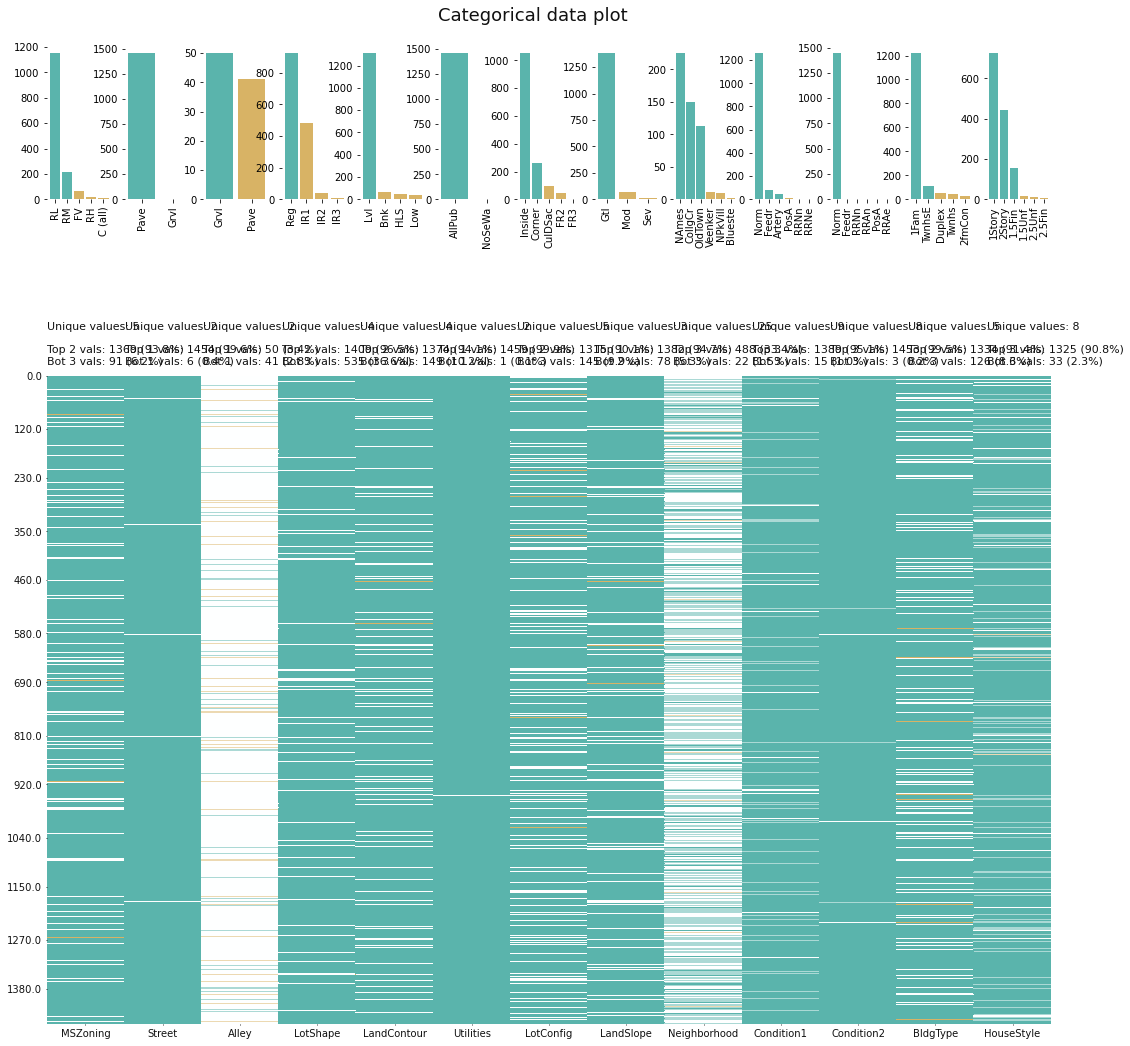

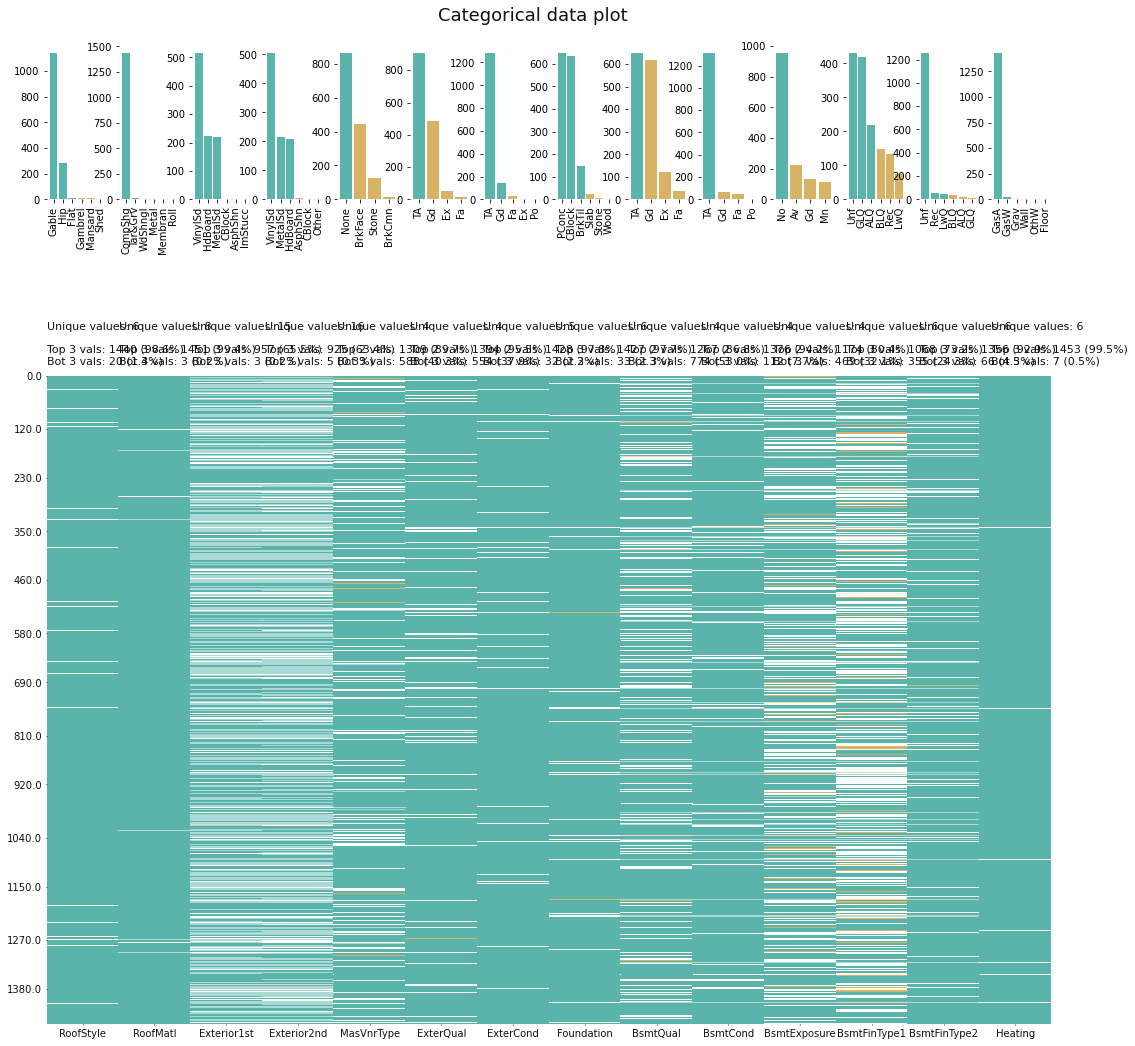

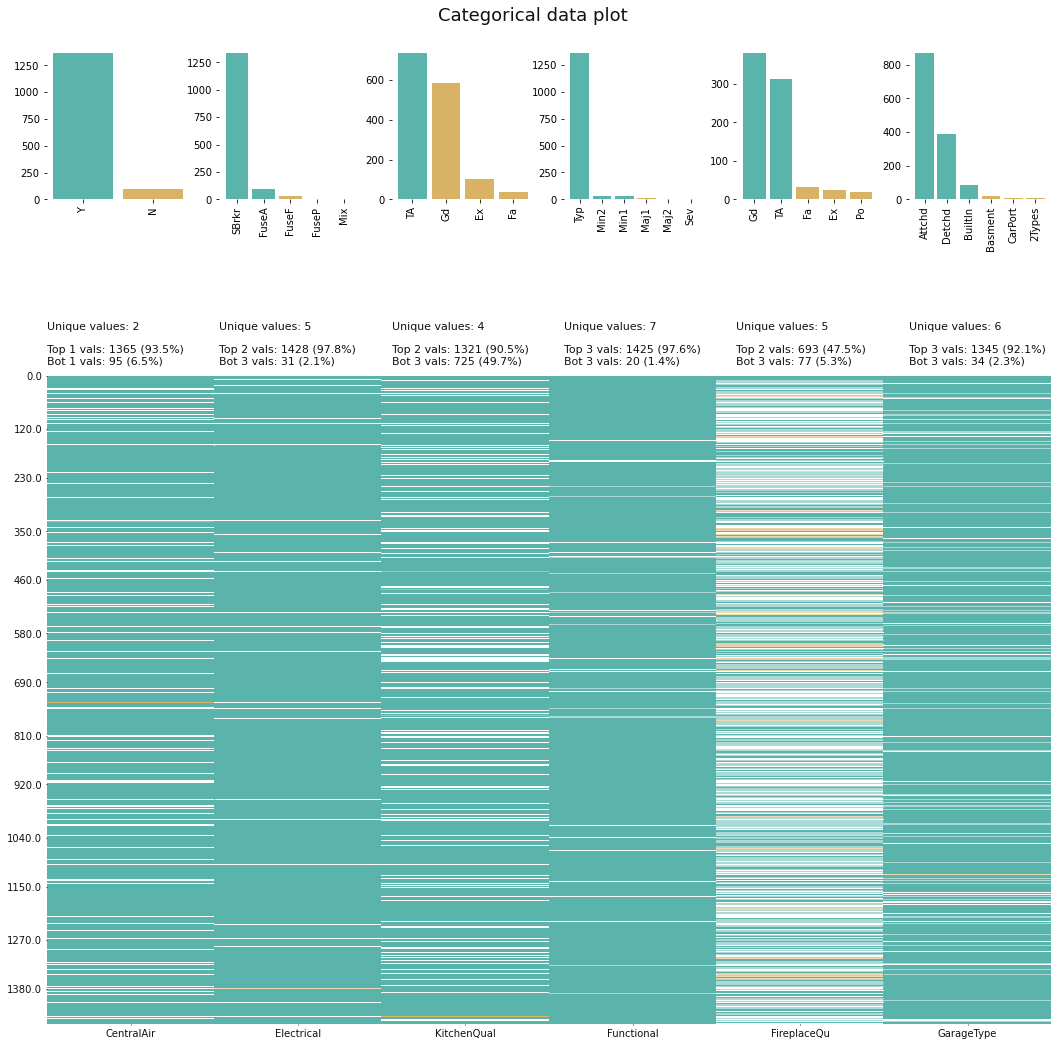

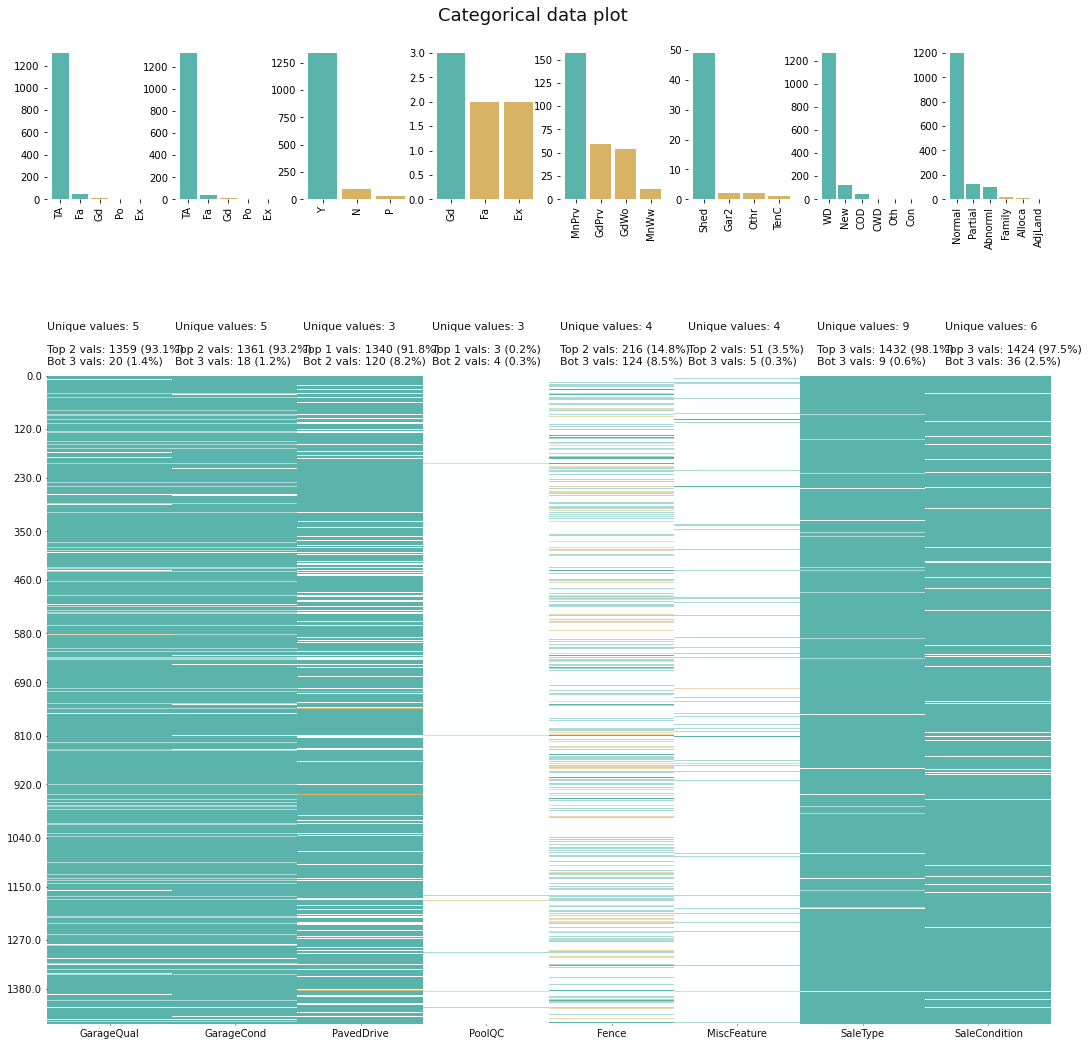

In [7]:
import klib
#Visualization of categorical variables( klib returns a visualization of the number and frequency of categorical features)
# (For clear visualization I have splitted data into parts)
klib.cat_plot(data.iloc[: , :20])
klib.cat_plot(data.iloc[: ,21:40])
klib.cat_plot(data.iloc[: ,41:60])
klib.cat_plot(data.iloc[: ,61:81])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

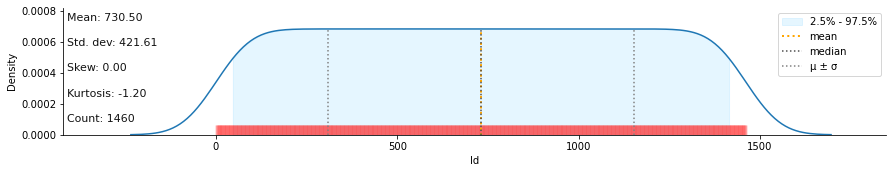

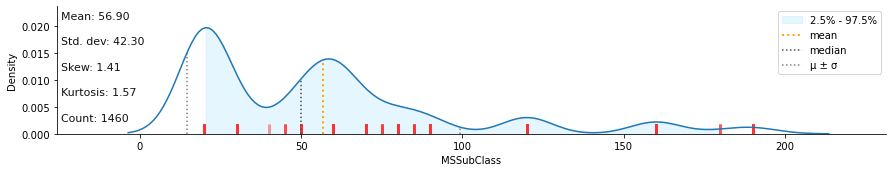

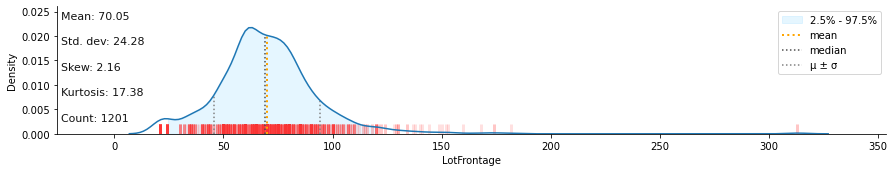

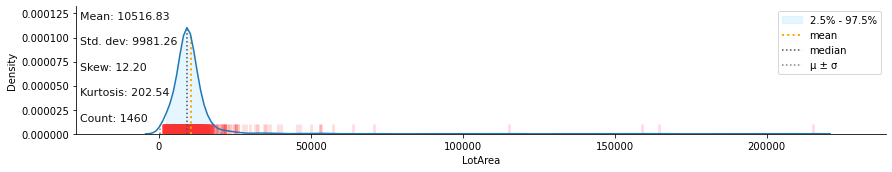

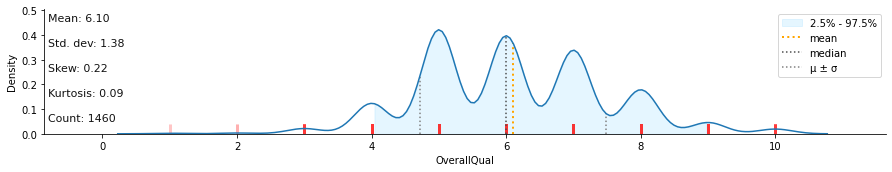

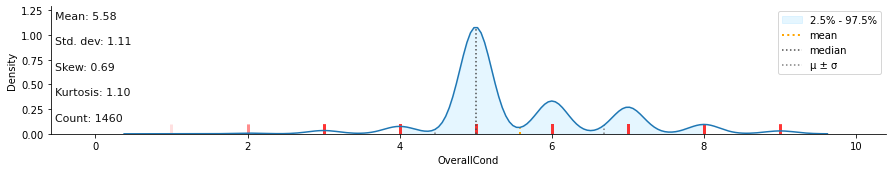

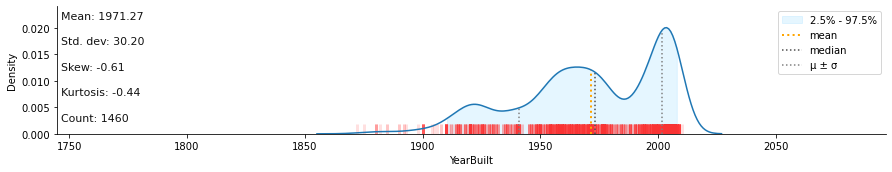

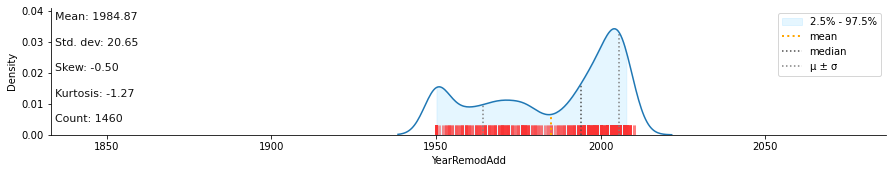

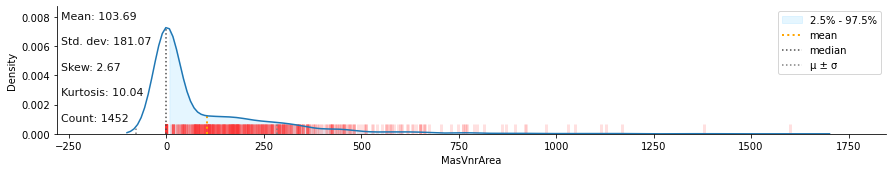

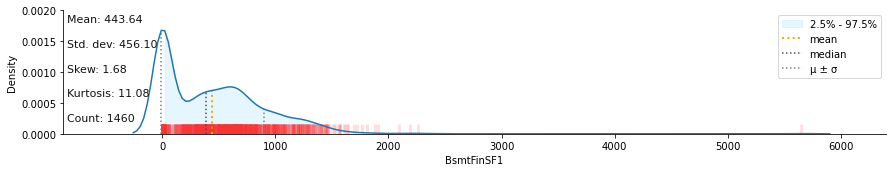

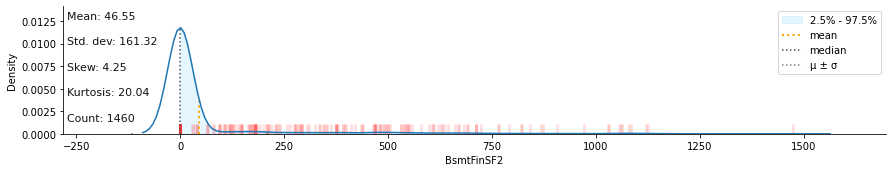

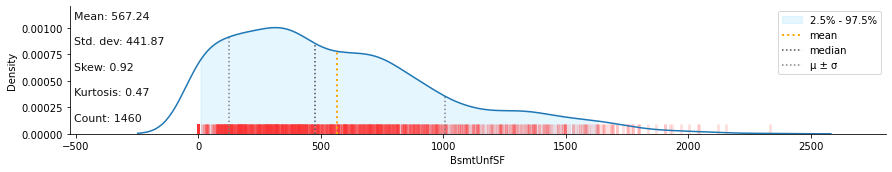

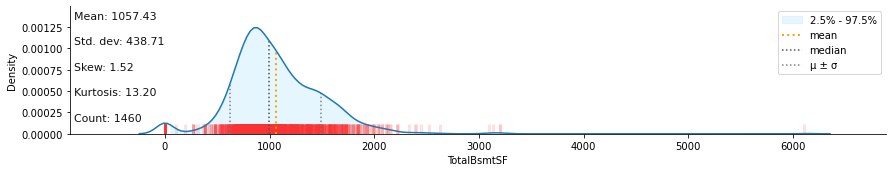

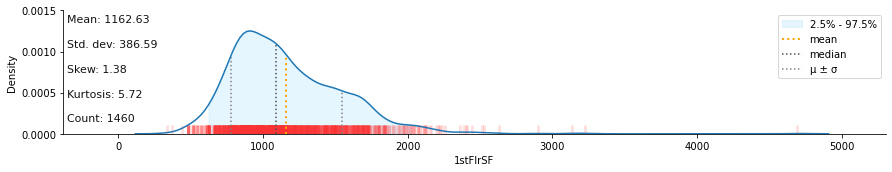

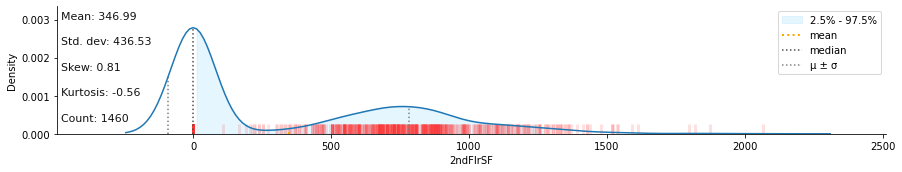

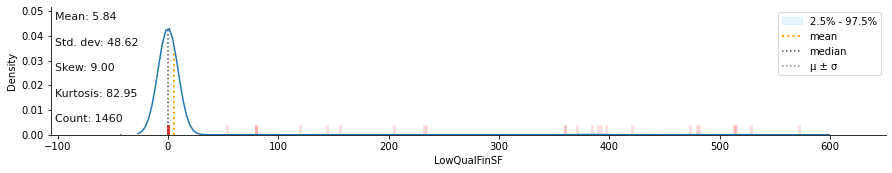

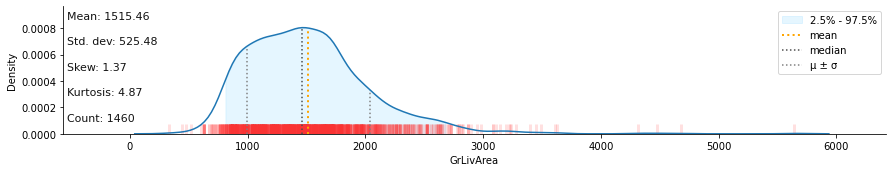

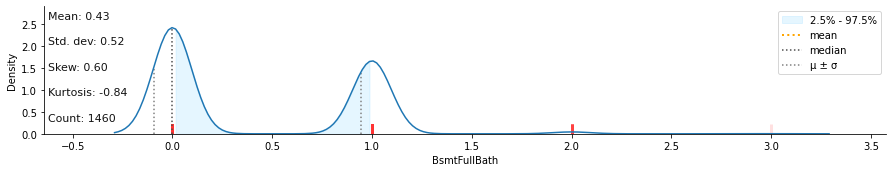

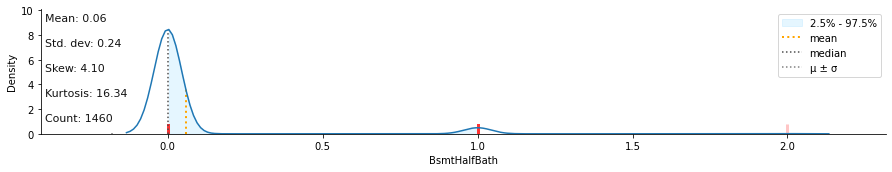

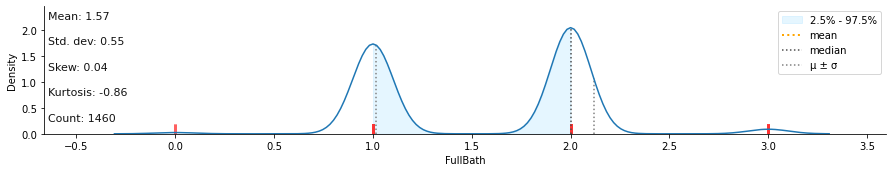

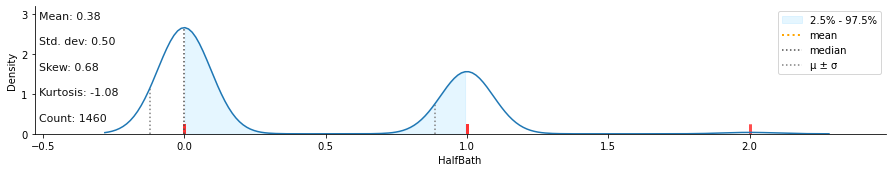

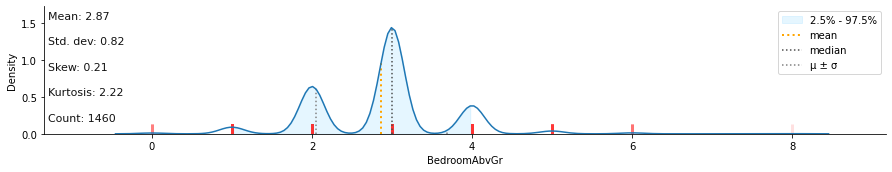

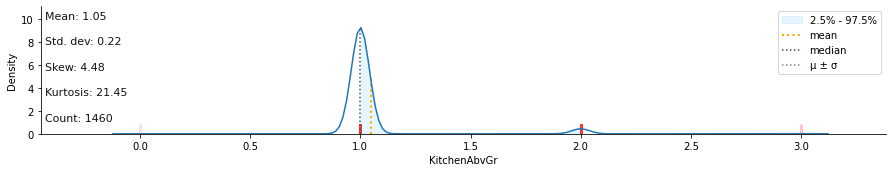

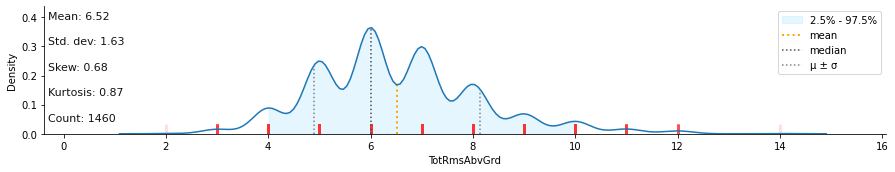

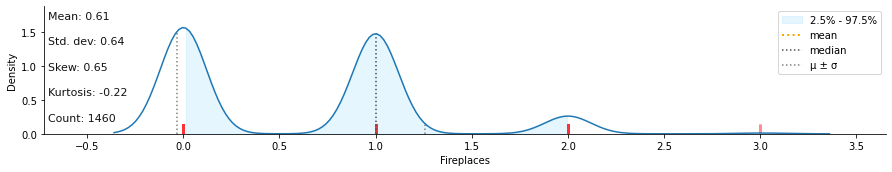

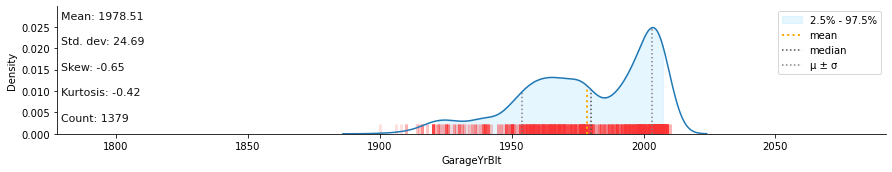

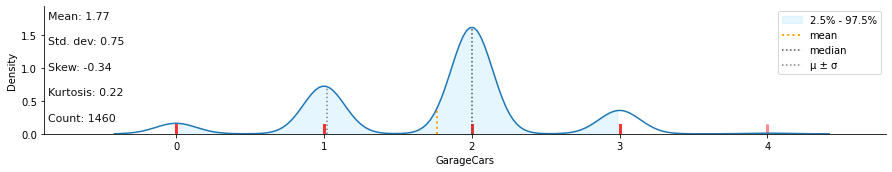

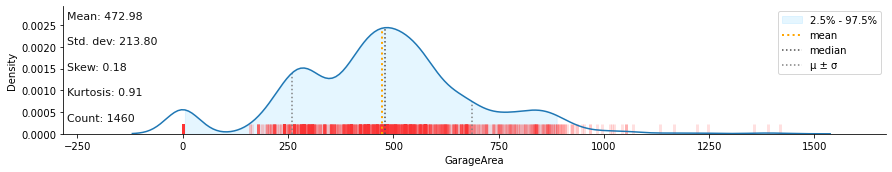

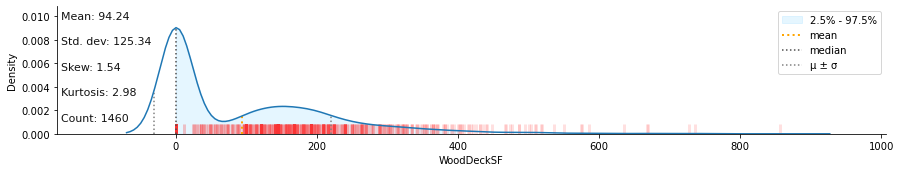

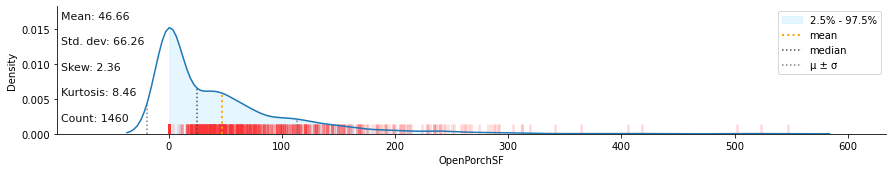

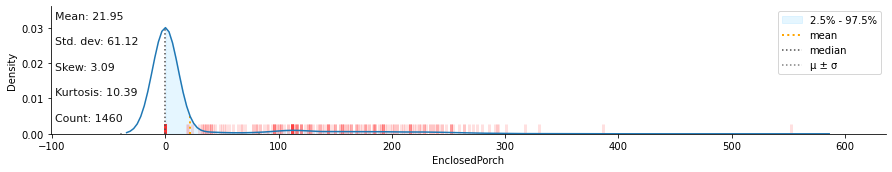

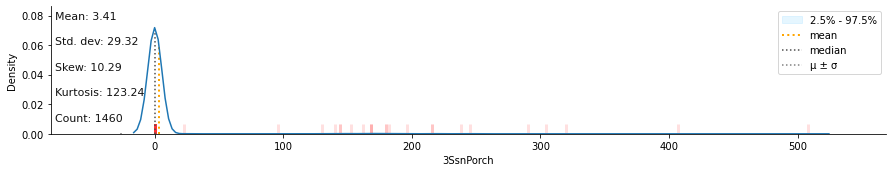

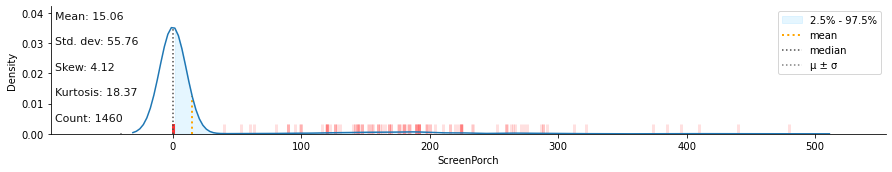

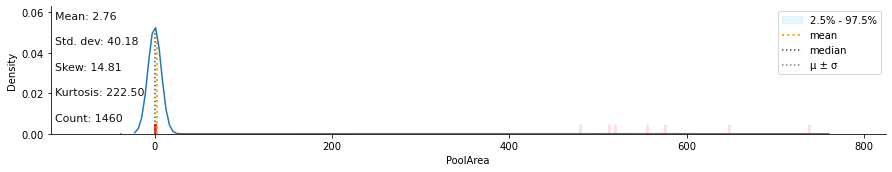

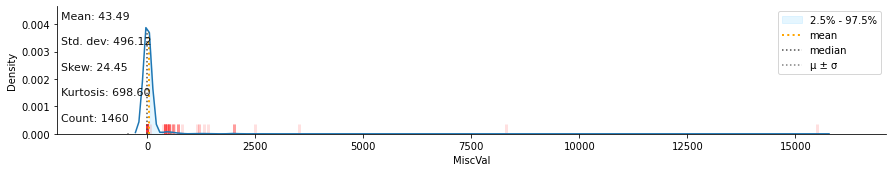

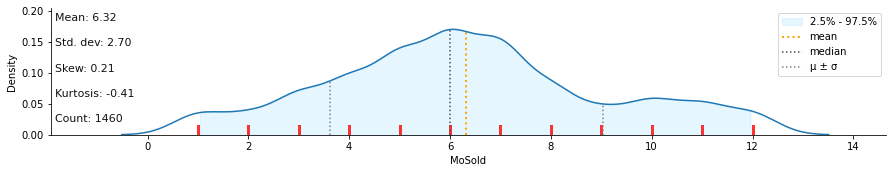

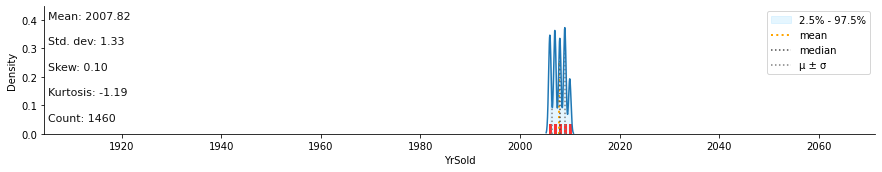

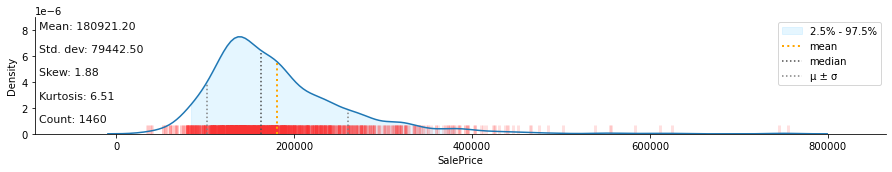

In [8]:
#Distribution plot for every numeric feature
klib.dist_plot(data, showall=True)

## Missing values
* First I plotted the missing value graph using klib library, from this we can observe the features having number of missing values with lines.
* To handle missing values I dropped columns having missing values greater than 80%
* Next I filled the missing values with mean, meadian, mode based on type of features and number of missing values

GridSpec(6, 6)

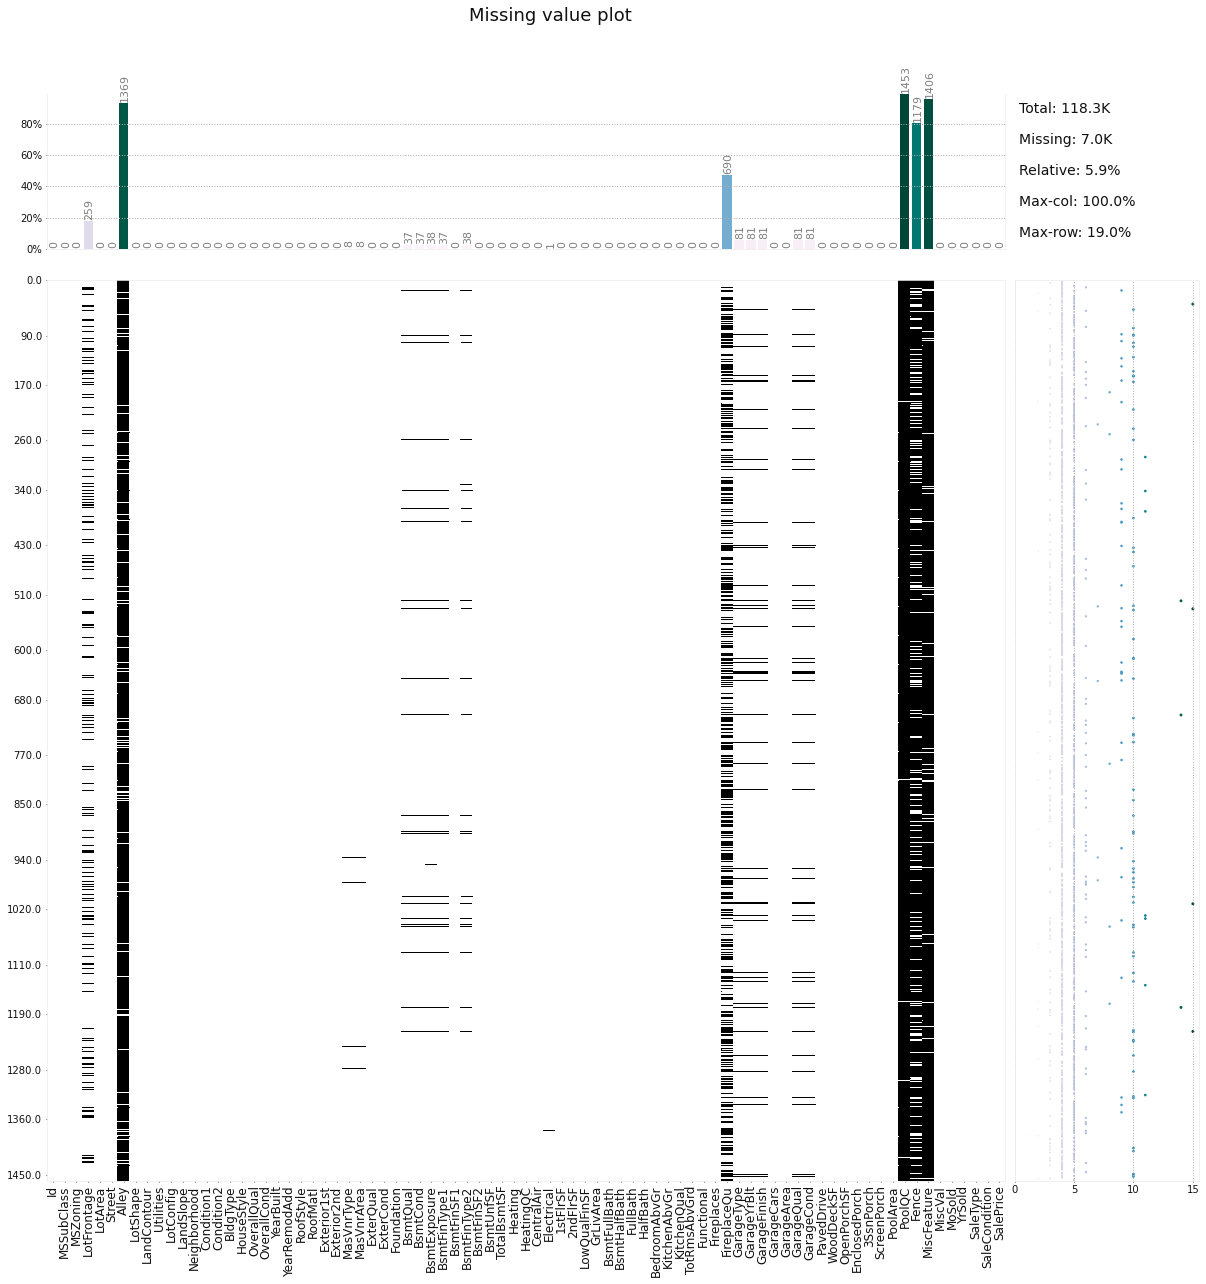

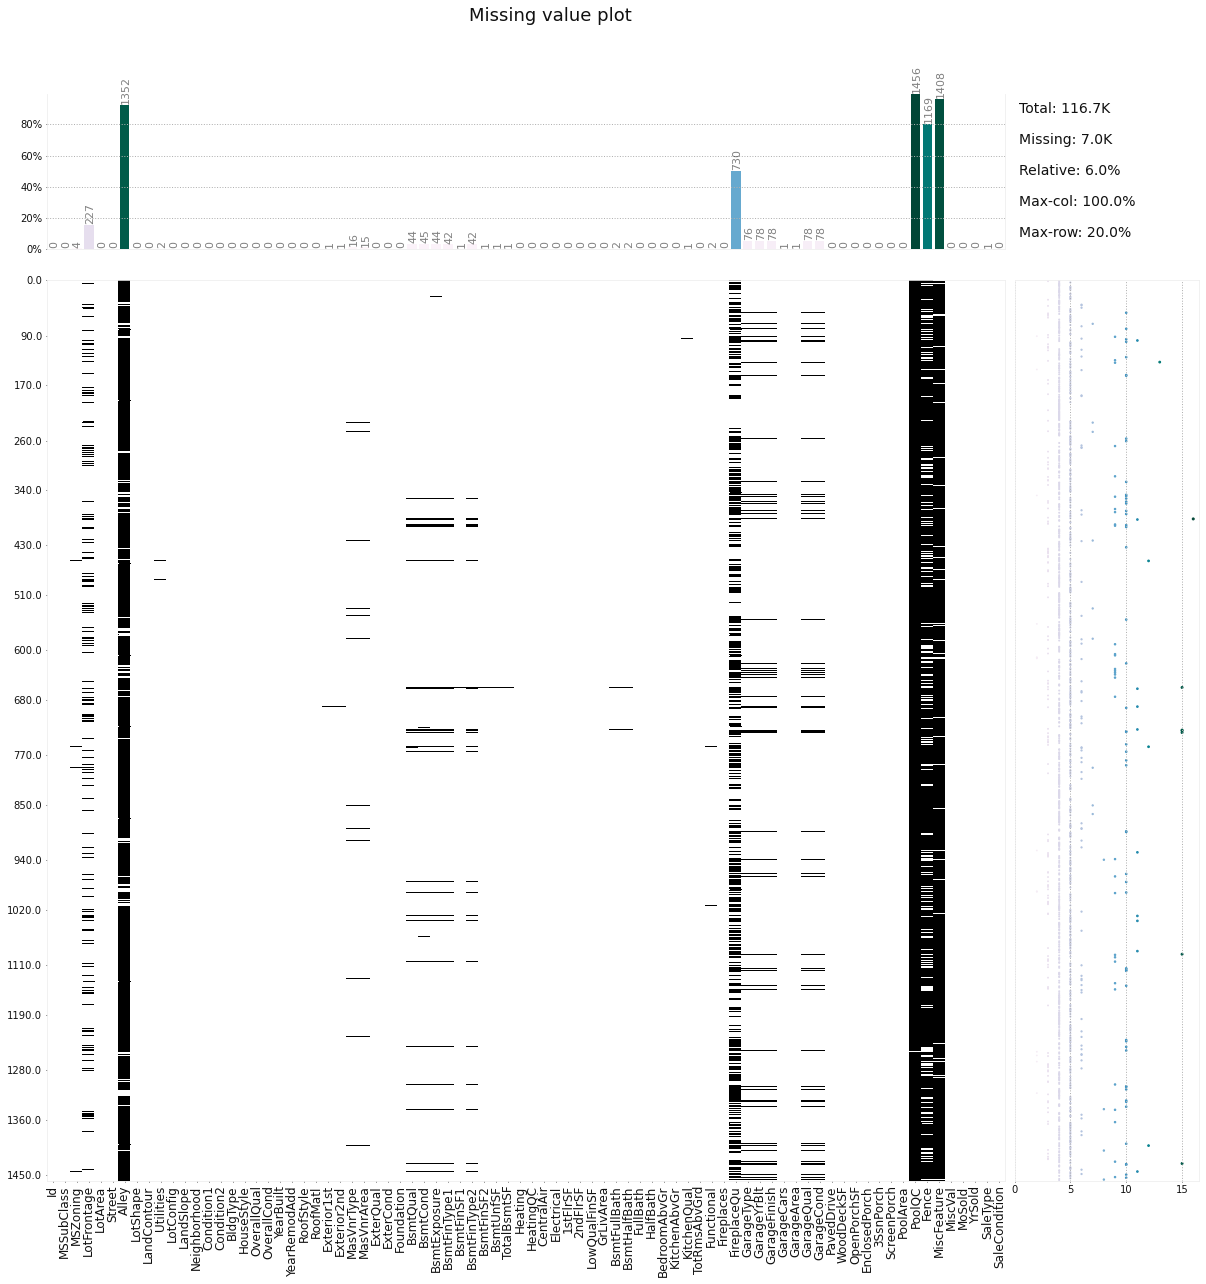

In [9]:
klib.missingval_plot(data) # returns a figure containing information about missing values
klib.missingval_plot(test1)

In [10]:
#Dropping columns
del_features=['Id','Street','Alley','Utilities','Condition2','RoofMatl','2ndFlrSF','Exterior2nd','MasVnrType','MasVnrArea','ExterCond','BsmtQual','BsmtFinType2','BsmtFinSF2','Heating','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','Functional','FireplaceQu','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal']
data.drop(del_features,inplace=True,axis=1)
del_features1=['Id','Street','Alley','Utilities','Condition2','RoofMatl','2ndFlrSF','Exterior2nd','MasVnrType','MasVnrArea','ExterCond','BsmtQual','BsmtFinType2','BsmtFinSF2','Heating','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','Functional','FireplaceQu','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal']
test=test1.drop(del_features1, axis=1)
data.shape, test.shape

((1460, 49), (1459, 48))

In [11]:
#Filling missing values in training data
data['BsmtFinSF1'].replace(0,data['BsmtFinSF1'].mean(),inplace=True)
data['BsmtUnfSF'].replace(0,data['BsmtUnfSF'].mean(),inplace=True)

data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0]) 
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0]) 
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])

data['BsmtCond'].replace(np.nan,'No class',inplace=True)
data['BsmtFinType1'].replace(np.nan,'No class',inplace=True)
data['GarageFinish'].replace(np.nan,'No class',inplace=True)

data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(),inplace=True)

#Filling missing values in testing data
test['BsmtFinSF1'].replace(0,test['BsmtFinSF1'].mean(),inplace=True)
test['BsmtUnfSF'].replace(0,test['BsmtUnfSF'].mean(),inplace=True)

test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0]) 
test['Electrical']=test['Electrical'].fillna(test['Electrical'].mode()[0]) 
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mode()[0])
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mode()[0])
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mode()[0])
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

test['BsmtCond'].replace(np.nan,'No class',inplace=True)
test['BsmtFinType1'].replace(np.nan,'No class',inplace=True)
test['GarageFinish'].replace(np.nan,'No class',inplace=True)

test['LotFrontage'].fillna(test['LotFrontage'].median(),inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(),inplace=True)
test.shape

(1459, 48)

In [12]:
Non_num1.columns, Numerical1.columns

(Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'),
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 

In [13]:
klib.missingval_plot(data)
klib.missingval_plot(test)

No missing values found in the dataset.
No missing values found in the dataset.


## Label encoder
Here I used label encoder to convert categorical variables into numerical values

In [14]:
#Encoding categorical variables using label encoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'ExterQual', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition']]=data[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'ExterQual', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition']].apply(label.fit_transform)

test[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'ExterQual', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition']]=test[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'ExterQual', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition']].apply(label.fit_transform)

## Correlation
Here to visualize correlation between features I used Klib correlation graph, there we can observe that some features are highly correlated to each other. Then I removed one of the variable among two  which is highly correlated with another

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

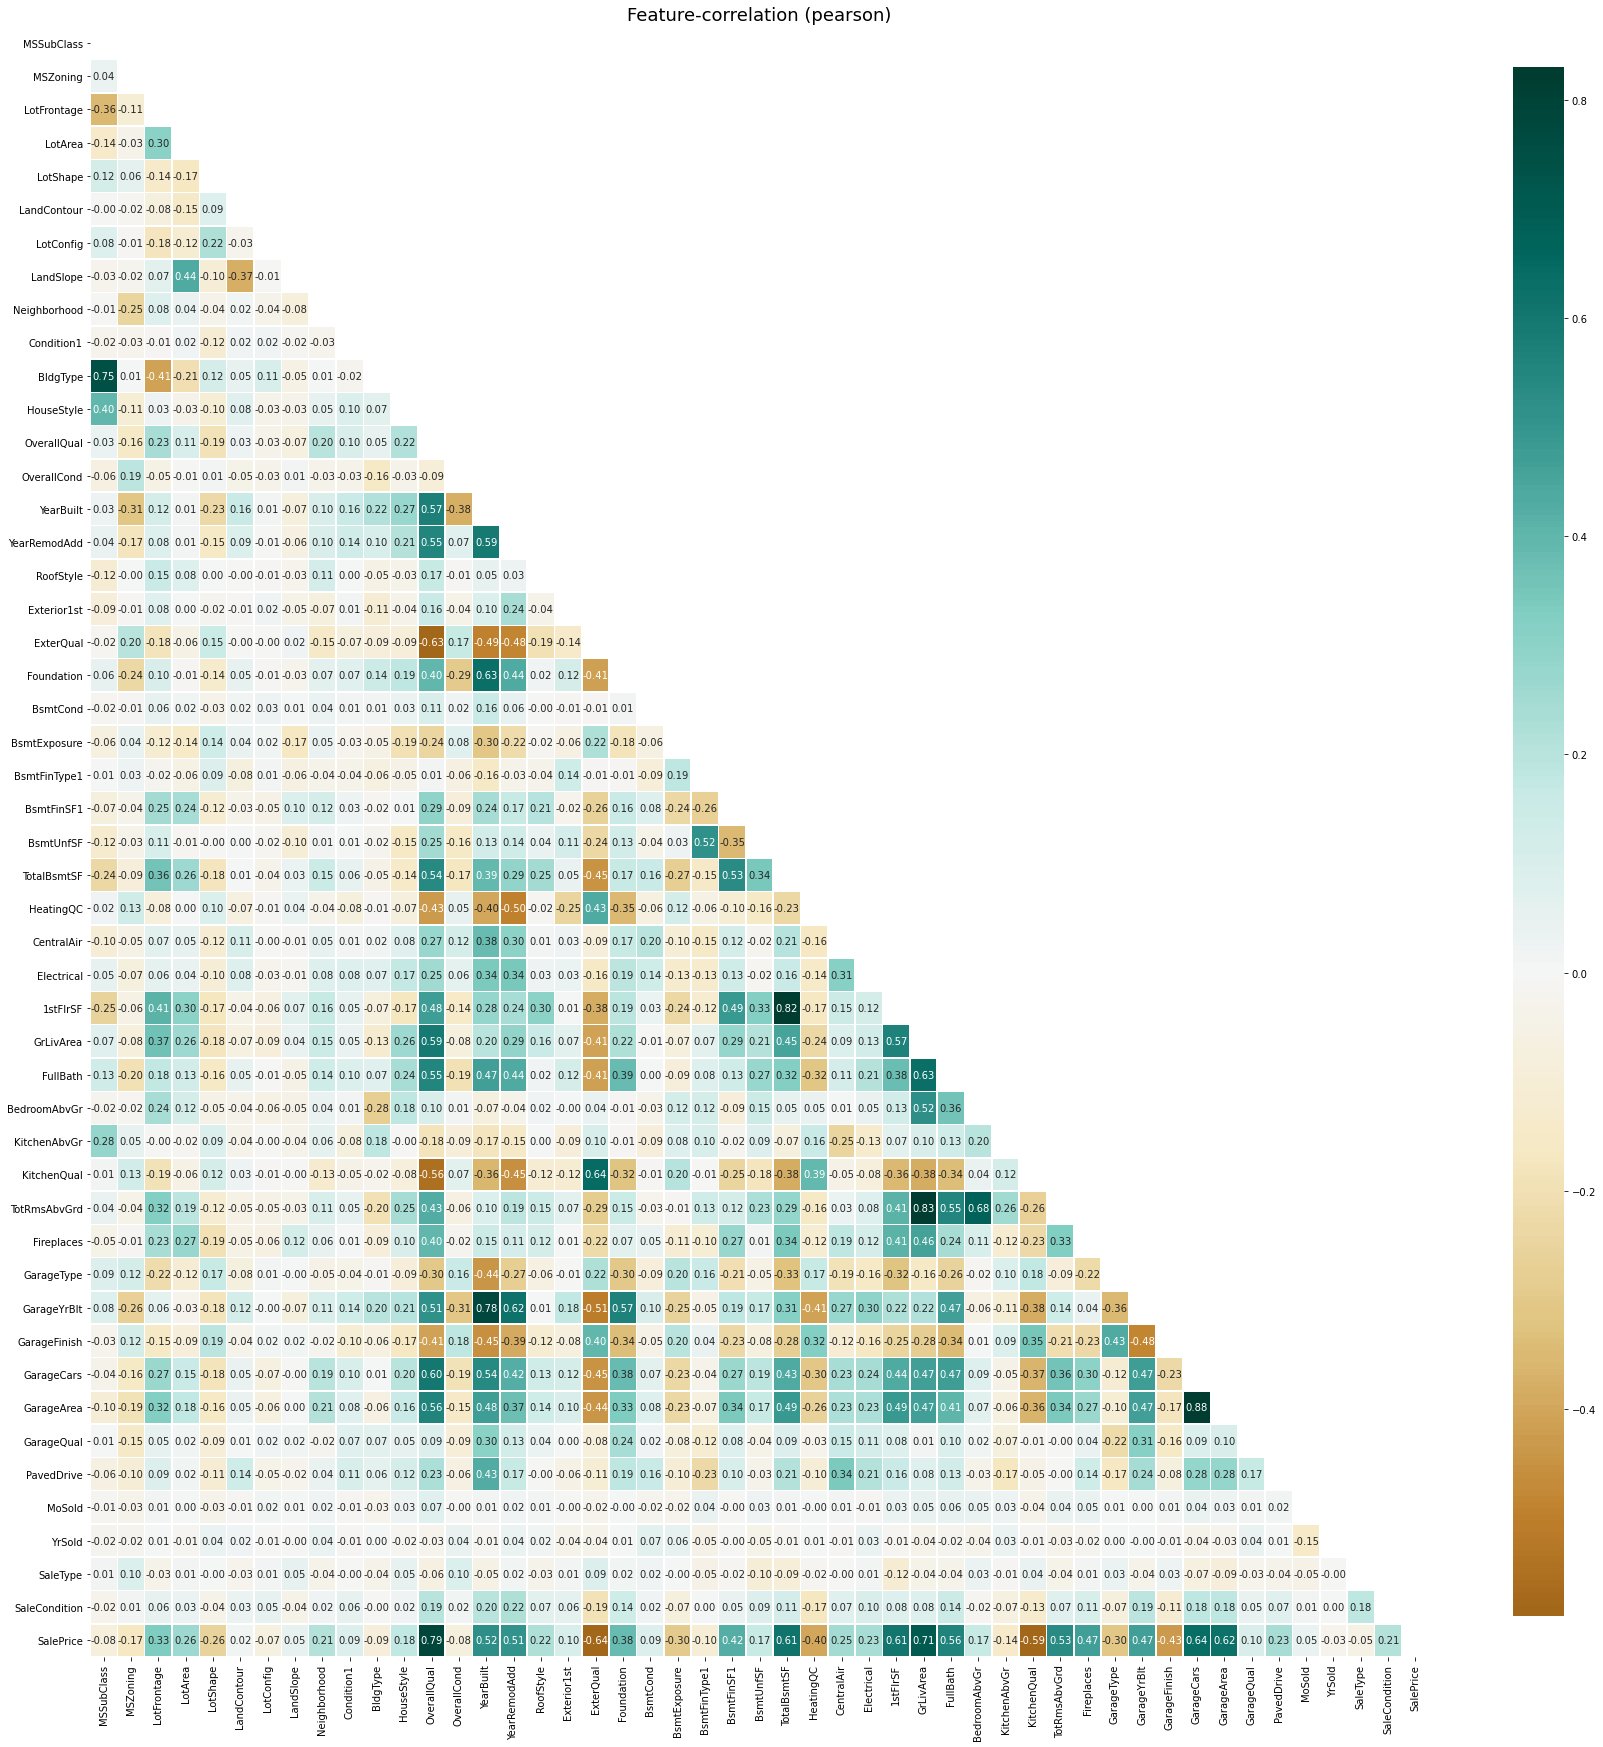

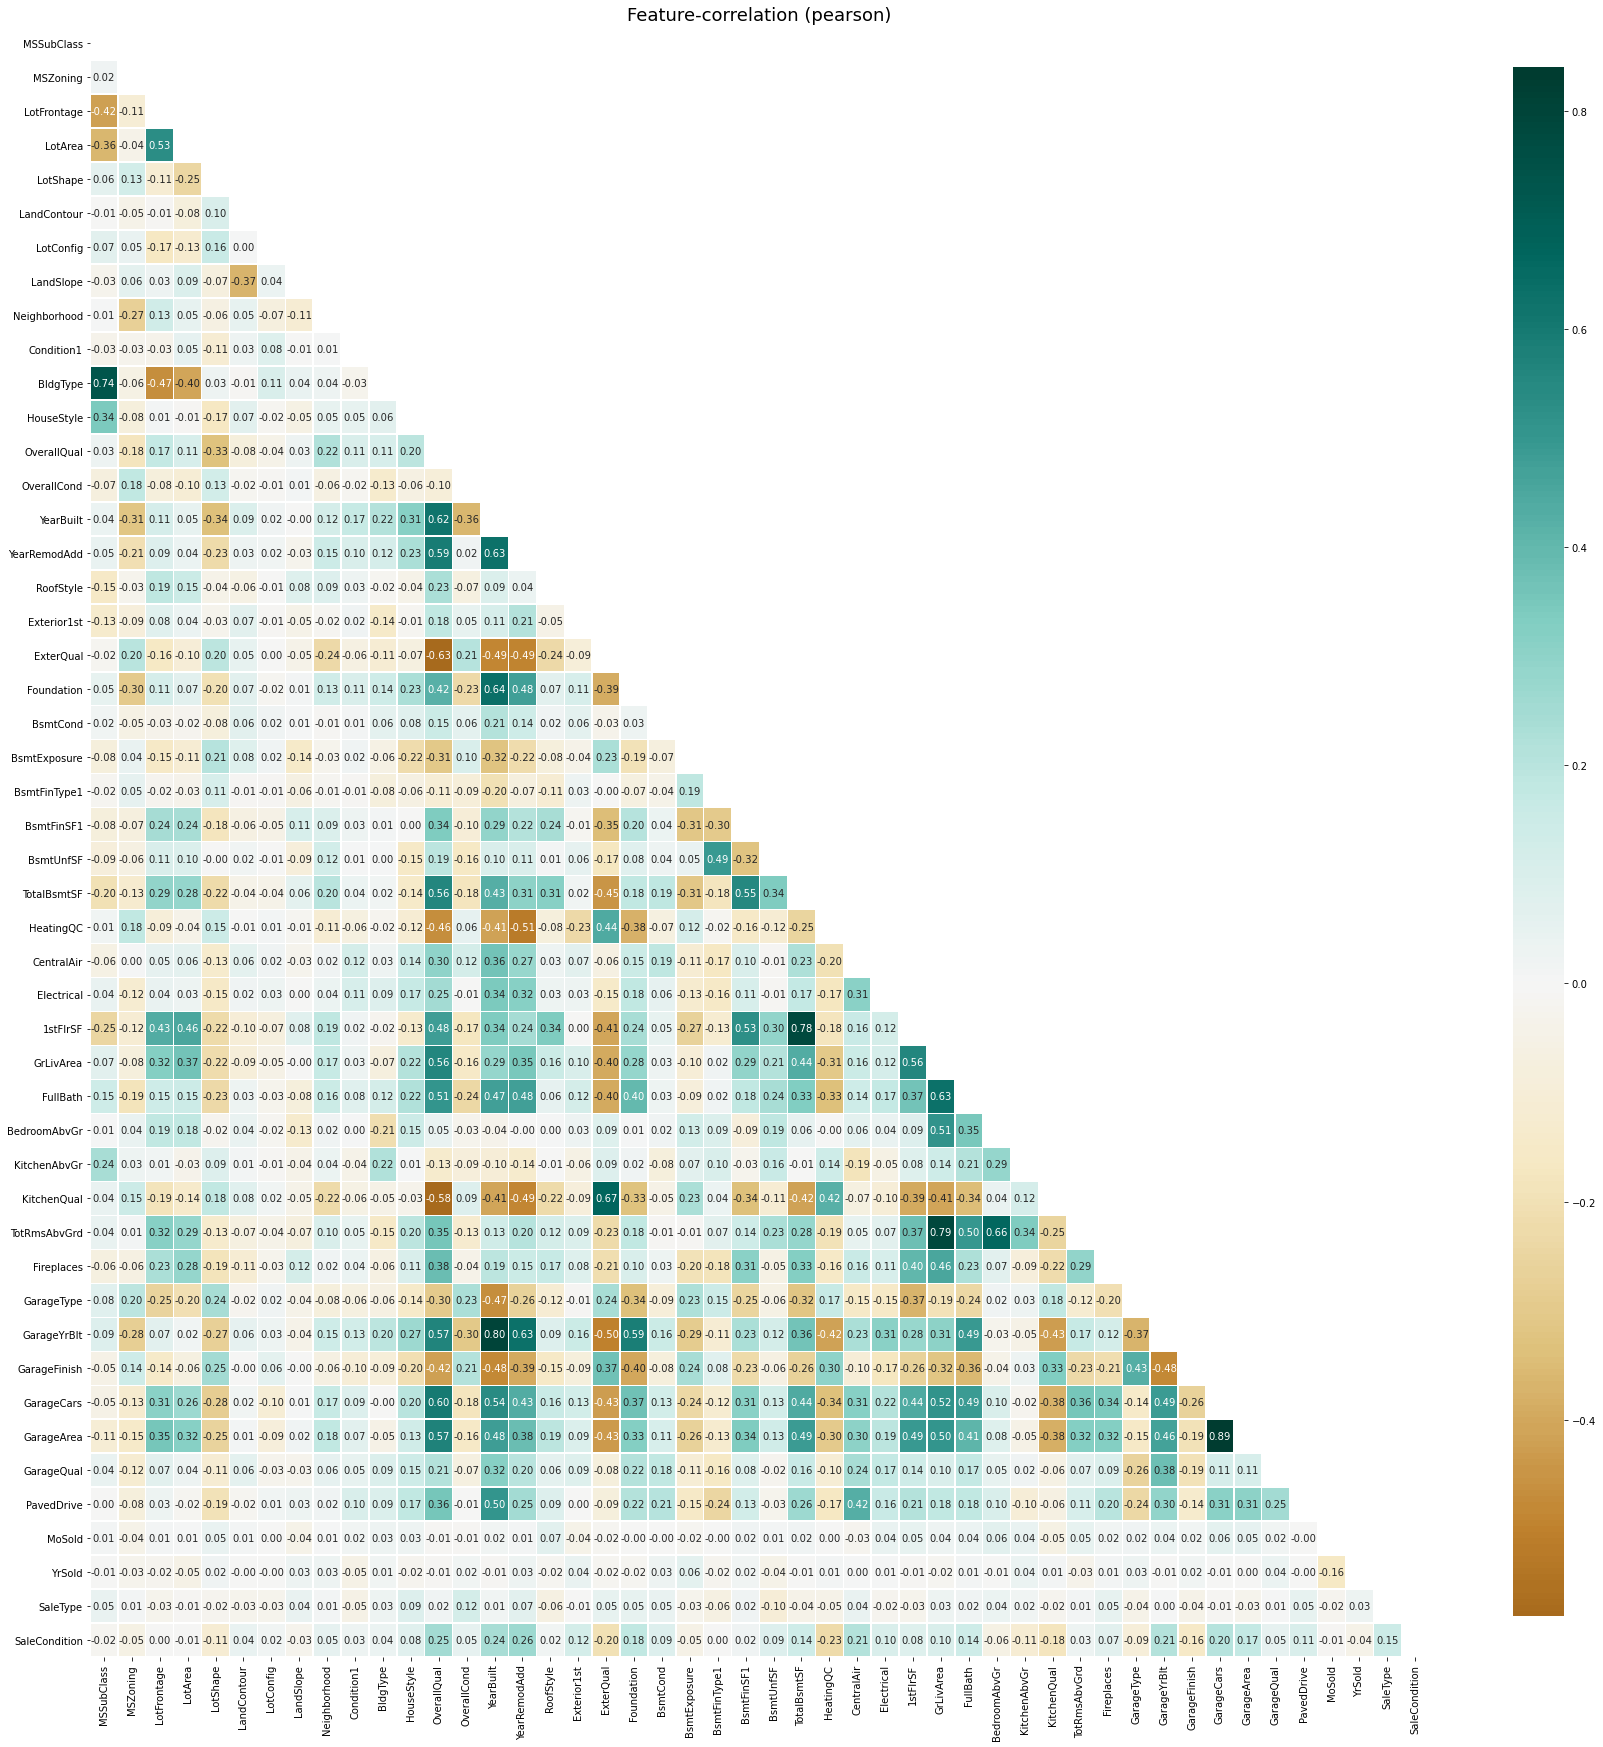

In [15]:
#correlation graph
klib.corr_plot(data, figsize=(30,30))
klib.corr_plot(test, figsize=(30,30))

In [16]:
correlation=data.corr()
columns = np.full((correlation.shape[0],), True)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.7: #Generally correlatiob value <0.7 is considered a strong correaltion
            if columns[j]:
                columns[j] = False
                
correlation1=test.corr()
columns1 = np.full((correlation1.shape[0],), True)
for i in range(correlation1.shape[0]):
    for j in range(i+1, correlation1.shape[0]):
        if correlation1.iloc[i,j] >= 0.7: #Generally correlation value r>0.7 is considered a strong correaltion
            if columns1[j]:
                columns1[j] = False
                
                
columns, columns1

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True, False,
         True,  True, False,  True,  True, False,  True,  True,  True,
         True,  True,  True, False]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True, False,
         True,  True, False,  True,  True, False,  True,  True,  True,
         True,  True,  True]))

In [17]:
data.drop(['1stFlrSF', 'BldgType', 'GarageArea', 'GarageYrBlt','TotRmsAbvGrd'], axis=1, inplace=True)
test.drop(['BldgType', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'], axis=1, inplace=True)

## Outlier handling
Using boxplot I visualize the outliers presented in some numerical variable. Then using Z-score method I removed Outliers from the variables

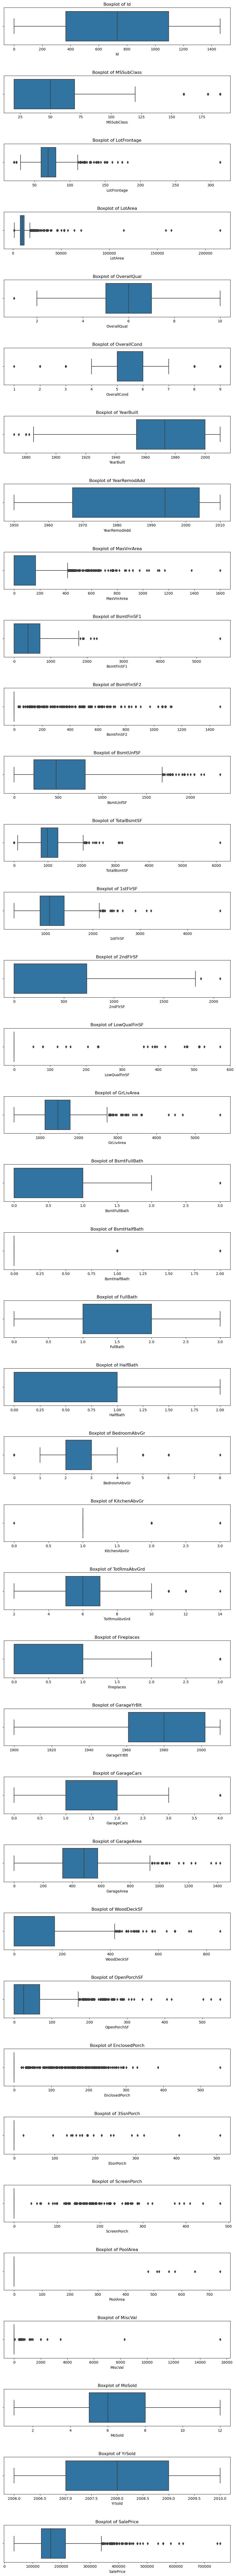

In [18]:
#Boxplot
fig = plt.figure(figsize=(10,100),dpi=100)
for index,col in enumerate(Numerical):
    plt.subplot(38,1,index+1,title="Boxplot of %s" %(col))
    sns.boxplot(Numerical.loc[:,col].dropna())
fig.tight_layout(pad=4.0)

In [19]:
#Removing outliers
from scipy import stats
z=np.abs(stats.zscore(data))
z1=np.abs(stats.zscore(test))
threshold=4
new_data=data[(z<4).all(axis=1)]

## Scaling
First I normalized some variables by using log transformation, Then I standardized all variables with mean 0 and variance 1 using standard scaler

In [20]:
#Normalizing data
data['MSSubClass']=np.log(data['MSSubClass'])
data['LotArea']=np.log(data['LotArea'])

data['OverallCond']=np.log(data['OverallCond'])
data['BsmtFinSF1']=np.log(data['BsmtFinSF1'])
data['TotalBsmtSF']=np.log(data['TotalBsmtSF'])
data['GrLivArea']=np.log(data['GrLivArea'])

In [21]:
#Standardizing data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit_transform(new_data)
scalar.fit_transform(test)

array([[-0.87471081, -1.50177721,  0.56732969, ...,  1.71390537,
         0.32475004,  0.20138321],
       [-0.87471081, -0.03909834,  0.61596272, ...,  1.71390537,
         0.32475004,  0.20138321],
       [ 0.06135085, -0.03909834,  0.27553157, ...,  1.71390537,
         0.32475004,  0.20138321],
       ...,
       [-0.87471081, -0.03909834,  4.45797141, ..., -1.35995811,
         0.32475004, -3.58981811],
       [ 0.64638939, -0.03909834, -0.30806469, ..., -1.35995811,
         0.32475004,  0.20138321],
       [ 0.06135085, -0.03909834,  0.27553157, ..., -1.35995811,
         0.32475004,  0.20138321]])

In [22]:
#Independent variables
x=new_data.drop(['SalePrice'],axis=1)
#Dependent variable
y=new_data['SalePrice']

In [23]:
#Splitting data into training set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((981, 43), (246, 43), (981,), (246,))

In [24]:
#Linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [25]:
#Model accuracy measures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('MODEL ACCURACY IN TRAINING PHASE:',model.score(x_train,y_train)*100)
print('MODEL ACCURACY IN TESTING PHASE:',model.score(x_test,y_test)*100)
print('R2_SCORE :',r2_score(y_test,y_pred)*100)
print('ADJUSTED R2_SCORE :',(1 - (1-model.score(x,y))*(len(y)-1)/(len(y)-x.shape[1]-1))*100)

MODEL ACCURACY IN TRAINING PHASE: 90.09853470863828
MODEL ACCURACY IN TESTING PHASE: 90.70343112661384
R2_SCORE : 90.70343112661384
ADJUSTED R2_SCORE : 89.88024163948597


In [26]:
#Forecasting accuracy measures
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE value is :", mse)
print("MAE value is :", mae)
print("RMSE value is :", rmse)

MSE value is : 525222092.17525464
MAE value is : 17313.362877231477
RMSE value is : 22917.724410928207


<AxesSubplot:xlabel='0', ylabel='Density'>

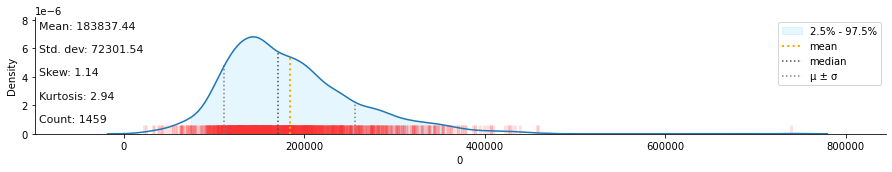

In [27]:
#Distribution plot of predicted values from linear regression
y_pred1=model.predict(test)
klib.dist_plot(y_pred1)

In [28]:
#!pip install --default-timeout=100 future
#!pip install xgboost
from xgboost import XGBRegressor
model1 = XGBRegressor(n_estimators=700,
                    learning_rate=0.02,
                    max_depth=3)
model1.fit(x_train,y_train)
y_pred2=model1.predict(x_test)
print('MODEL ACCURACY IN TRAINING PHASE:',model1.score(x_train,y_train)*100)
print('MODEL ACCURACY IN TESTING PHASE:',model1.score(x_test,y_test)*100)
print('MODEL ACCURACY IS: ', model1.score(x_test,y_test)*100)

MODEL ACCURACY IN TRAINING PHASE: 96.91022440670199
MODEL ACCURACY IN TESTING PHASE: 91.80167760619324
MODEL ACCURACY IS:  91.80167760619324


In [29]:
#Forecasting accuracy measures
mse1=mean_squared_error(y_test,y_pred2)
mae1=mean_absolute_error(y_test,y_pred2)
rmse1=np.sqrt(mse1)
print("MSE value is :", mse1)
print("MAE value is :", mae1)
print("RMSE value is :", rmse1)

MSE value is : 463175188.4643485
MAE value is : 14588.43394308943
RMSE value is : 21521.505255542615


<AxesSubplot:xlabel='0', ylabel='Density'>

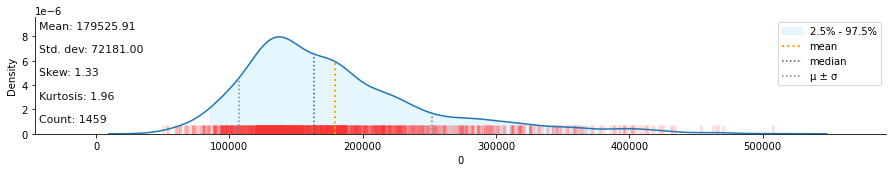

In [30]:
##Distribution plot of predicted values from XGBoost
y_pred3=model1.predict(test)
klib.dist_plot(y_pred3)

In [31]:
#Since XGBoost preforms well, we use this model for our final prediction of test data
test1['Saleprice']=y_pred3
Output=pd.DataFrame(test1, columns=['Id', 'Saleprice'])
Output.head()

,Id,Saleprice
0,1461,128439.984375
1,1462,164286.031250
2,1463,188325.093750
3,1464,190876.375000
4,1465,194646.968750


In [32]:
Output.to_csv('Submission.csv', index=False)